In [ ]:
# for execution in google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# System imports
from os import path
import math

!pip install ipympl
!pip install mplcursors # for interactive point selection on images

# Third-Party Imports
import cv2
import matplotlib.pyplot as plt
import mplcursors
import numpy as np

# project directory
datadir = "./"

# sample images directory
imagesfn = datadir + "images/"
!cp -r "$imagesfn" .

# output/results directory
outputfn = datadir + "output/"
!cp -r "$outputfn" .

: 

In [ ]:
# This is almost entirely ChatGPt; just used for manual key feature mapping

from google.colab import output
output.enable_custom_widget_manager()
from ipywidgets import Button, VBox
from IPython.display import display

# List to store coordinates of the clicked points
clicked_points1 = []
clicked_points2 = []

def PointsClicker(im1, im2):
    global clicked_points1, clicked_points2

    # Create a figure and axis for the plot
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(im1[:,:,[2,1,0]])
    ax[1].imshow(im2[:,:,[2,1,0]])

    # Function to record clicks
    def on_click(event):
        # Get the coordinates of the mouse click
        x, y = event.xdata, event.ydata
        x, y = int(x), int(y)
        if x is None or y is None:
            return
        if len(clicked_points1) == len(clicked_points2):
            clicked_points1.append([x,y])
            print(f"Clicked on im1: {x}, {y}")
            # Optionally, plot a red dot at the clicked location
            ax[0].plot(x, y, 'ro', markersize=1)
            plt.draw()
            # on_im1 = False
        else:
            clicked_points2.append([x,y])
            print(f"Clicked on im2: {x}, {y}")
            # Optionally, plot a red dot at the clicked location
            ax[1].plot(x, y, 'ro', markersize=1)
            plt.draw()
            # on_im1 = True

    # Connect the click event
    cid = fig.canvas.mpl_connect('button_press_event', on_click)
    stop_button = Button(description="Stop Interaction")

    # Function to stop interaction when the button is clicked
    def stop_interaction(b):
        fig.canvas.mpl_disconnect(cid)  # Disconnect the click event handler
        print("Interaction stopped.")
        plt.close(fig)  # Optionally close the plot when stopping

    # Connect the stop button to the stop function
    stop_button.on_click(stop_interaction)

    # Display the stop button below the plot
    display(VBox([stop_button]))

    # Show the plot
    plt.show()

: 

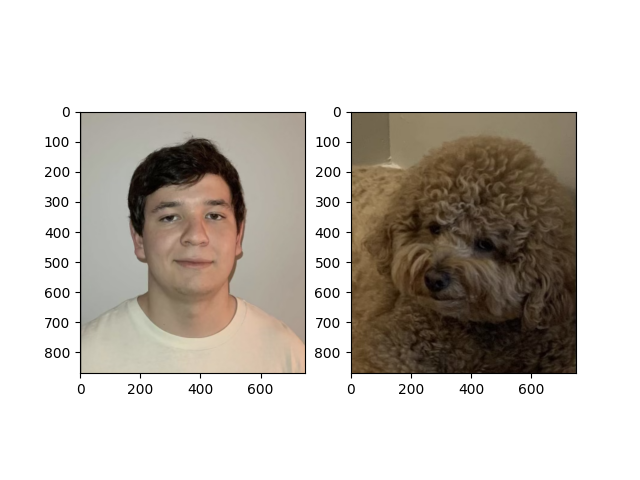

Clicked on im1: 388, 429
Clicked on im2: 273, 576
Clicked on im1: 298, 356
Clicked on im2: 283, 386
Clicked on im1: 451, 350
Clicked on im2: 446, 443
Interaction stopped.


In [8]:
im1 = cv2.imread(imagesfn+'hiatt.jpg')[:870,:750,:]
im2 = cv2.imread(imagesfn+'toby.jpg')[:870,-750:,:]
H,W,_ = im1.shape
'''
This behaves somewhat confusingly:
PointsClicker essentially just sets up the behavior of the widget, the cell has finished executing once this is done.
This means we don't get nonempty values from the clicked_pts arrays until after the widget is closed in the following cell.

Using the interactive cell:
- select pt in im1 (left), then the corresponding feature in im2 (right)
- should see red dot appear over image and location of pt printed
- note: no enforcement on clicking the correct image; if you click im1 twice in a row it will think you clicked the sa
'''
%matplotlib widget
PointsClicker(im1, im2)

In [9]:
plt.close('all')
%matplotlib inline

# now clicked_pts1 and 2 are populated with corresponding features in each image
print(f'clicked_pts1: {clicked_points1}')
print(f'clicked_pts2: {clicked_points2}')

clicked_pts1: [[388, 429], [298, 356], [451, 350]]
clicked_pts2: [[273, 576], [283, 386], [446, 443]]
